# U.S. Medical Insurance Costs
by Eduardo Leon Saldaña

In [1]:
#Importing the libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 

In [2]:
#Setting up the dataframe
insurance_data = pd.read_csv("insurance.csv")

#Taking a look at the data
print(insurance_data.head(10))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


The file is loaded as a DataFrame in pandas, now apply the describe method to explore the statistics on the Charges column:

In [3]:
insurance_data["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

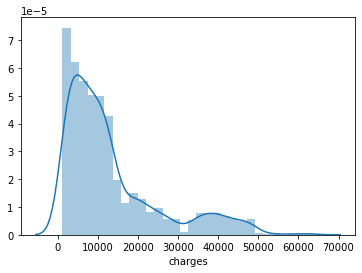

In [4]:
sns.distplot(insurance_data["charges"])

In [5]:
insurance_data["charges"].skew()

1.5158796580240388

In [6]:
insurance_data["charges"].kurt()

1.6062986532967907

The data has a non normal distribution due its skewness to the right due most of the lower bounds are too low in comparison of the outliers. A correlation array could help to spot the relevant variables that has some impact on the Chargers variable.    

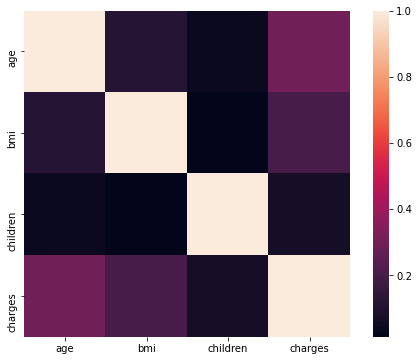

In [7]:
corremat = insurance_data.corr()
f, ax = plt.subplots(figsize = (8,6))
sns.heatmap(corremat, vmax= 1.0, square = True)

It looks that the Chargers variable have some correlation with the variables BMI and Age, those 2 will be the ones to explore.

### Medical Insurance Costs by Age

In [8]:
#Using the Numpy method "Unique" to retrieve all the unique values in the age column
print(np.unique(insurance_data["age"].values))

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]


The insurance data shows multiple ages, starting from 18 to 64 so includes every type of generation by age range.According to the market research firm Beresford Research these are the updated birth years and ages by generation:

| Generation     | Born         | Ages         |
| :------------- | :----------: | -----------: |
|  Gen Z         | 1997 - 2012  | 9 - 24       |
| Millenials     | 1981 - 1996  | 25 - 40      |
| Gen X          | 1965 - 1980  | 41 - 56      |
| Baby Boomers   | 1955 - 1964  | 57 - 66      |


source: https://www.beresfordresearch.com/age-range-by-generation/

In [9]:
#Setting up the DataFrame
insurance_df = pd.DataFrame(insurance_data, columns = ["age", "bmi", "children", "smoker", "region", "charges", "sex"])

#Styling the table
print(insurance_df.head())

   age     bmi  children smoker     region      charges     sex
0   19  27.900         0    yes  southwest  16884.92400  female
1   18  33.770         1     no  southeast   1725.55230    male
2   28  33.000         3     no  southeast   4449.46200    male
3   33  22.705         0     no  northwest  21984.47061    male
4   32  28.880         0     no  northwest   3866.85520    male


In [10]:
#Currency format function, will come handy later on
def currency(x):
    return "${:.1f}K".format(x/1000)

In [11]:
#Adding the generation group row into a new DF

generation_df = pd.DataFrame(insurance_data, columns = ["age", "charges", "sex", "bmi", "smoker"])
generation_df.loc[generation_df["age"] < 24, "Generation group"] = "Gen Z"
generation_df.loc[(generation_df["age"] > 24) & (generation_df["age"] <=40), "Generation group"] = "Millenial"
generation_df.loc[(generation_df["age"] > 40) & (generation_df["age"] <= 56), "Generation group"] = "Gen X"
generation_df.loc[(generation_df["age"] > 56), "Generation group"] = "Baby Boomer"

In [12]:
#Averages Medical Insurance Costs by Generation Group
generation_df.groupby(["Generation group"])["charges"].mean().apply(currency).reset_index()

,Generation group,charges
0,Baby Boomer,$19.3K
1,Gen X,$15.5K
2,Gen Z,$8.8K
3,Millenial,$11.0K


(-0.5, 3.5, 0.0, 75000.0)

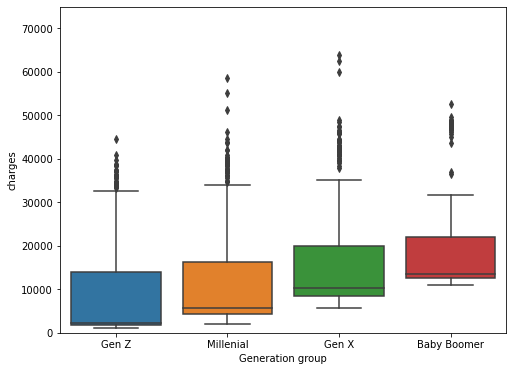

In [13]:
#Boxplots by Generation groups
var = "Generation group"

data = pd.concat([generation_df["charges"], generation_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig =sns.boxplot(x=var, y="charges", data = data)
fig.axis(ymin=0,ymax=75000)

The Baby Boomer generation are the one who paid more for insurance costs and on the other hand the younger generations paid small amounts in comparison of the older generations, on the boxplot the older you get more expensive your medical insurance cost will be. On the data are some outliers that increases the chargers considerably having in mind the maximum value by each generation group.

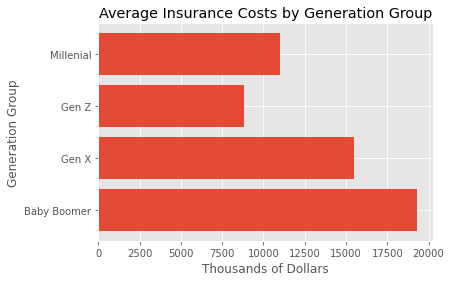

In [26]:
#Plotting the Generation Groups by average charge

generations = ["Baby Boomer", "Gen X", "Gen Z", "Millenial"]
averages = [19300, 15500, 8800, 11000]
plt.style.use("ggplot")
plt.barh(generations, averages)
plt.title("Average Insurance Costs by Generation Group")
plt.xlabel("Thousands of Dollars")
plt.ylabel("Generation Group")
plt.show()

Baby Boomer also paid the most charges in average, older generations are more expensive. By adding the sex variable into the generation group will indicates if a sex tend to paid more than other. 

In [27]:
#Grouping the dataframe with Generation group & Sex
generation_df.groupby(["Generation group", "sex"])["charges"].mean().apply(currency).reset_index()

,Generation group,sex,charges
0,Baby Boomer,female,$18.9K
1,Baby Boomer,male,$19.8K
2,Gen X,female,$14.6K
3,Gen X,male,$16.4K
4,Gen Z,female,$8.9K
5,Gen Z,male,$8.8K
6,Millenial,female,$10.0K
7,Millenial,male,$12.0K


It looks that males tend to paid more for medical insurances than females; older males will get the more expensive cost for his medical insurance in comparison to younger males and females in general.

<ipython-input-23-1f20d6394170>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


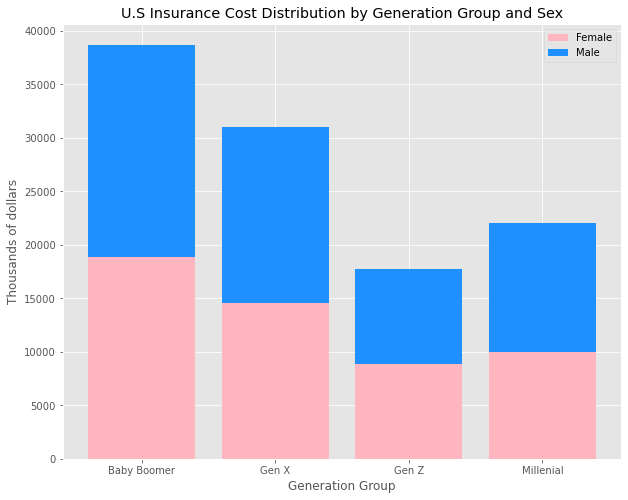

In [23]:
#Creating the plot displaying the distribution
generations = ["Baby Boomer", "Gen X", "Gen Z", "Millenial"]
Female = [18900, 14600, 8900, 10000]  
Male = [19800, 16400, 8800, 12000]

x = range(4)

c_top = np.add(Female, Male)
plt.figure(figsize=(10,8))
plt.bar(x,Female,color="lightpink")
plt.bar(x,Male,color="dodgerblue" ,bottom=Female)
ax = plt.subplot()
ax.set_xticks(range(len(generations)))
ax.set_xticklabels(generations)
plt.title("U.S Insurance Cost Distribution by Generation Group and Sex")
plt.xlabel("Generation Group")
plt.ylabel("Thousands of dollars")
plt.legend(["Female", "Male"])

### Medical Insurance Costs by BMI Weight Type

The second variable to analyze will be the BMI (Body Mass Index) this has an impact at the moment to get a medical insurance cost, due this index measures if we have a healthy body or not. An unhealthy body will paid more than a healthy one.

To get a better control in the BMI data is neccesary to classify it according the type of body, the Centers for Disease Control (CDC) categorizes the BMI into the next groups:


| Classification  | BMI Value        | 
| :------------- | :----------: | 
|  Underweight        | < 18.5 | 
| Healthy     | > 18. 5 < 25  | 
| Overweight         | > 25 < 30  | 
| Obesity   | > 30  | 

source = https://www.cdc.gov/obesity/adult/defining.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obesity%20range.

In [24]:
#Adding the bmi by group row into a new DF

bmi_df = pd.DataFrame(generation_df, columns = ["Generation group", "charges", "sex", "bmi"])
bmi_df.loc[bmi_df["bmi"] < 18.5, "BMI classification"] = "Underweight"
bmi_df.loc[(bmi_df["bmi"] > 18.5) & (bmi_df["bmi"] <= 25.0), "BMI classification"] = "Healthy"
bmi_df.loc[(bmi_df["bmi"] > 25.0) & (bmi_df["bmi"] <= 30.0), "BMI classification"] = "Overweight"
bmi_df.loc[(bmi_df["bmi"] > 30.0), "BMI classification"] = "Obesity"

print(bmi_df.head())

  Generation group      charges     sex     bmi BMI classification
0            Gen Z  16884.92400  female  27.900         Overweight
1            Gen Z   1725.55230    male  33.770            Obesity
2        Millenial   4449.46200    male  33.000            Obesity
3        Millenial  21984.47061    male  22.705            Healthy
4        Millenial   3866.85520    male  28.880         Overweight


(-0.5, 3.5, 0.0, 75000.0)

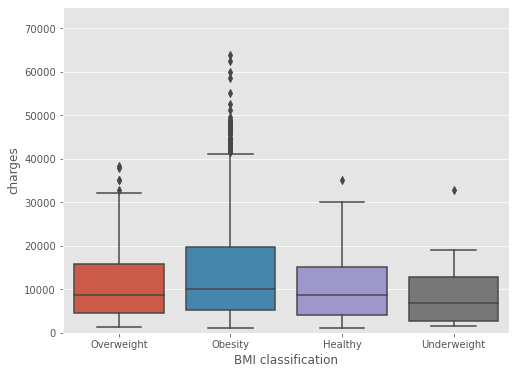

In [25]:
var_1 = "BMI classification"

data = pd.concat([bmi_df["charges"], bmi_df[var_1]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig =sns.boxplot(x=var_1, y="charges", data = data)
fig.axis(ymin=0,ymax=75000)

Although the Underweight body has the highest minimum value the Obesity group is the one who has the most charges by body type. By definition the Obesity increases the risk of health problems and impact directly at the cost of the insurance, on the other hand a healthy body will paid less due does not have a risk of having health problems.

Once again adding the sex variable into the BMI group will help to analyze whether a certain sex tend 

In [30]:
#Grouping by BMI and Sex
bmi_df.groupby(["BMI classification", "sex"])["charges"].mean().apply(currency).reset_index()

,BMI classification,sex,charges
0,Healthy,female,$11.0K
1,Healthy,male,$9.9K
2,Obesity,female,$14.4K
3,Obesity,male,$16.6K
4,Overweight,female,$10.6K
5,Overweight,male,$11.4K
6,Underweight,female,$11.0K
7,Underweight,male,$5.6K


Text(0.5, 1.0, 'Insurance Cost by BMI & Sex')

<Figure size 1440x1080 with 0 Axes>

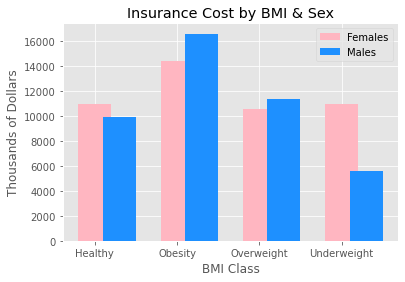

In [35]:
#Side by side graph sex and BMI distribution 
bmi_class = ["Healthy", "Obesity", "Overweight", "Underweight"]
plt.figure(figsize=(20,15))
female_mean = [11000, 14400, 10600, 11000]
male_mean = [9900, 16600, 11400, 5600]

fig, ax = plt.subplots()
y_pos=np.arange(len(bmi_class))
plt.bar(y_pos + 0, female_mean, width = 0.4, color = "lightpink", label = "Female")
plt.bar(y_pos + 0.3, male_mean, width = 0.4, color ="dodgerblue", label = "Male")

plt.xticks(y_pos, bmi_class)
plt.ylabel("Thousands of Dollars")
plt.xlabel("BMI Class")
plt.legend(("Females", "Males"))
plt.title("Insurance Cost by BMI & Sex")

Males are more prone to be heavier than females, the Obesity and Overweight BMI are more current into males than females; on the other hand females tend to have a healthier bodies than males. The Underweight BMI shows that women tend to suffer more from this than males.

In [61]:
#Counting the BMI classification by sex
bmi_df.groupby(["BMI classification", "sex"])["Generation group"].count().reset_index()

,BMI classification,sex,Generation group
0,Healthy,female,114
1,Healthy,male,106
2,Obesity,female,329
3,Obesity,male,365
4,Overweight,female,192
5,Overweight,male,183
6,Underweight,female,12
7,Underweight,male,8


At last, one outliers that has been appearing in the box plots is whether a person smokes or not. Smoking is an habit that increases the risk of getting lung cancer or heart problems. By grouping the data into Non Smokers and Smokers will help to visualize how impact at the cost.

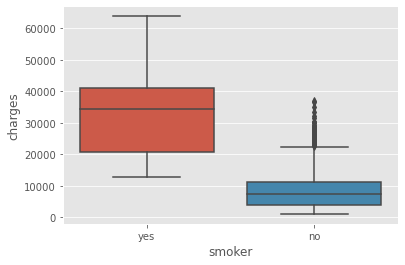

In [79]:
#Grouping by Non Smokers & Smokers
smoker_df = pd.DataFrame(insurance_data,columns=["charges", "smoker", "sex"])

#Creating the boxplot by smoking habit
sns.boxplot(x = "smoker", y = "charges", data = smoker_df)

A person who does not have the smoking paid in average around less than 10,000 USD anually per medical insurances; on the other hand a person who smokes by average paid around 35,000 USD an increase of nearly quadruple than someone that does not have this habtit. 

By results:

 - Older generations paid more for medical insurance cost than young ones.
 - On the dataset Males suffer more Obesity or Overweight than females, both variables who impact on the cost.
 - Smoking increases significally the cost of an medical insurance.